<a href="https://colab.research.google.com/github/Rajshah64/antariksh_work/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Housing Case Study

Problem Statement:
Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

- To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

- To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

- To know the accuracy of the model, i.e. how well these variables can predict house prices.

## Step 1: Reading and Understanding the Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
housing = pd.read_csv('/content/boston-housing-dataset.csv')
housing.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
housing.shape

(506, 15)

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    int64  
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    int64  
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  B           506 non-null    float64
 13  LSTAT       506 non-null    float64
 14  MEDV        506 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 59.4 KB


In [ ]:
housing.dropna()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [ ]:
housing.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
housing = housing.drop('Unnamed: 0', axis=1)

In [ ]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Step 2: Preparing the Data for modelling

- Encoding:
  - Converting the binary categorical variables to 1/0.
  - Converting the other categorical variables into dummy variables.
- Train Test Split
- Rescaling the features

In [ ]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Train Test Split

In [ ]:
df_train, df_test = train_test_split(housing, train_size=0.7, random_state=42)
print(df_train.shape)
print(df_test.shape)

(354, 14)
(152, 14)


Note: There are usually three methods in most `sklearn` classes
- fit(): which calculates the values for the task
- transform(): actually performs the task
- fit_transform(): does both

In case of normalisation, fit calculates xmin and xmax and transform applies the formula of normalistion on the given data points

In [ ]:
scale = MinMaxScaler()



df_train[df_train.columns] = scale.fit_transform(df_train[df_train.columns])
df_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
5,0.000234,0.0,0.036562,0.0,0.150206,0.522066,0.574665,0.448545,0.086957,0.066794,0.648936,0.992990,0.096026,0.526667
116,0.001377,0.0,0.331700,0.0,0.333333,0.470409,0.716787,0.145541,0.217391,0.467557,0.553191,0.990922,0.284492,0.360000
45,0.001825,0.0,0.214851,0.0,0.129630,0.369941,0.318229,0.361084,0.086957,0.087786,0.563830,1.000000,0.233996,0.317778
16,0.011744,0.0,0.261214,0.0,0.314815,0.421395,0.271885,0.306359,0.130435,0.229008,0.893617,0.974658,0.133830,0.402222
468,0.174971,0.0,0.636638,0.0,0.401235,0.419565,0.701339,0.161755,1.000000,0.914122,0.808511,0.928993,0.452539,0.313333


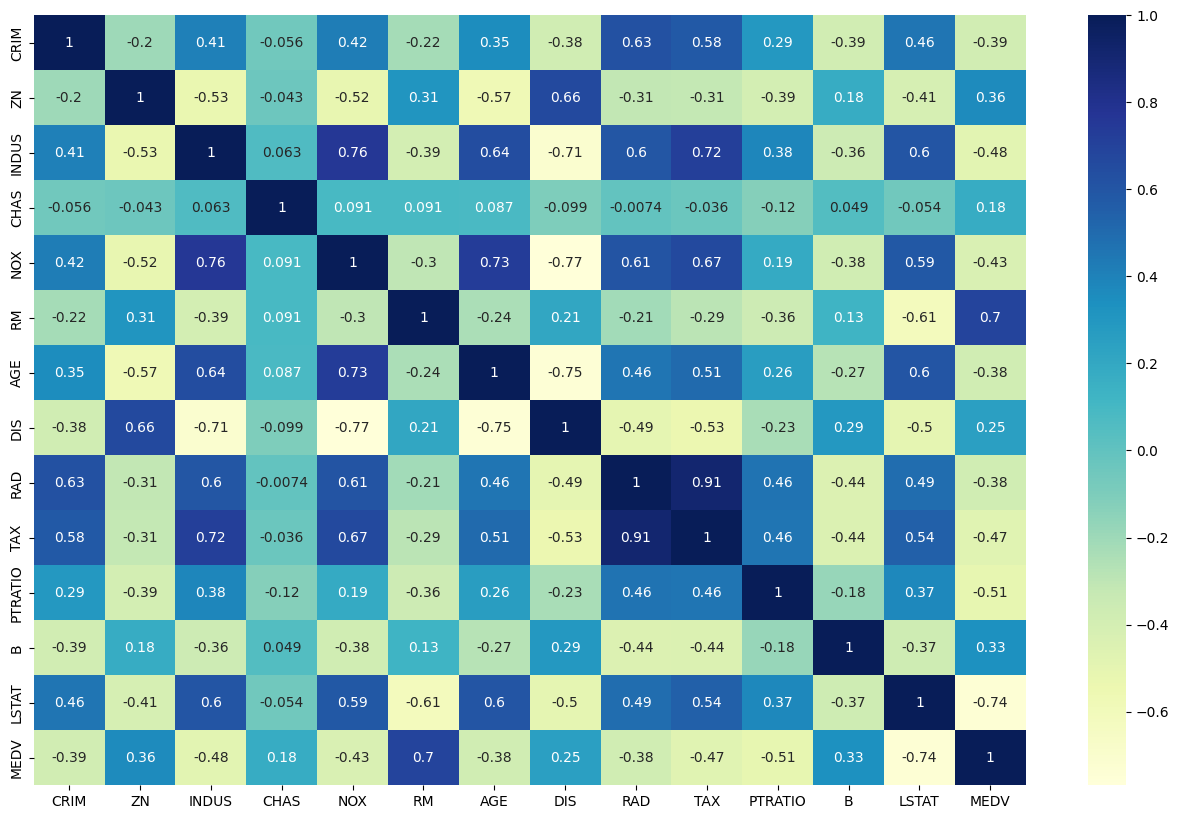

In [ ]:
# creating a heatmap of all the variables
plt.figure(figsize=(16,10))
sns.heatmap(housing.corr(), annot=True, cmap='YlGnBu')
plt.show()

## Step 3: Training the Model

In [ ]:
y_train = df_train.pop('MEDV')
X_train = df_train

In [ ]:
y_train.head()

5      0.526667
116    0.360000
45     0.317778
16     0.402222
468    0.313333
Name: MEDV, dtype: float64

We will be using `statsmodel` library here as we need the analysis of the model

### Adding all the variables to the model

In [ ]:
# check all the columns of the dataframe
housing.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [ ]:
# build a linear model for all the variables

X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_sm).fit()

## Step 4: Predictions and Evaluations on the Test Set

Now, that we have got our final model we will apply the values on the test set.



In [ ]:
df_test[df_test.columns] = scale.transform(df_test[df_test.columns])
df_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
173,0.000930,0.000000,0.107049,0.0,0.257202,0.519219,0.836251,0.137921,0.173913,0.208015,0.425532,0.996470,0.201711,0.413333
274,0.000533,0.421053,0.196005,1.0,0.127572,0.588774,0.308960,0.268076,0.130435,0.127863,0.531915,1.000000,0.049669,0.608889
491,0.001087,0.000000,1.000000,0.0,0.460905,0.431157,0.987642,0.067155,0.130435,1.000000,0.797872,0.982879,0.450883,0.191111
72,0.000928,0.000000,0.361855,0.0,0.057613,0.447834,0.050463,0.378079,0.130435,0.225191,0.702128,0.984896,0.104581,0.395556
452,0.057112,0.000000,0.636638,0.0,0.674897,0.495017,0.915551,0.112632,1.000000,0.914122,0.808511,0.970220,0.428808,0.246667


In [ ]:
df_test.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,0.044275,0.118629,0.374499,0.059211,0.336879,0.473065,0.670971,0.248559,0.383009,0.427519,0.666923,0.880787,0.316314,0.364620
std,0.104003,0.262988,0.252432,0.236799,0.234315,0.133152,0.302068,0.187592,0.386321,0.331424,0.199664,0.253904,0.198728,0.192459
min,-0.000031,0.000000,-0.028270,0.000000,0.014403,-0.061420,0.033986,0.003592,0.000000,0.001908,0.042553,0.005547,0.031733,0.000000
25%,0.000794,0.000000,0.168960,0.000000,0.131173,0.408735,0.378991,0.098860,0.130435,0.177481,0.553191,0.932536,0.158733,0.251667
50%,0.002630,0.000000,0.319638,0.000000,0.302469,0.467053,0.778579,0.223277,0.173913,0.272901,0.702128,0.984946,0.283940,0.333333
75%,0.048986,0.000000,0.636638,0.000000,0.471193,0.528879,0.948507,0.355198,1.000000,0.914122,0.808511,0.998506,0.439708,0.425000
max,0.826429,1.052632,1.000000,1.000000,1.000000,0.988814,1.000000,0.871218,1.000000,1.000000,1.000000,1.000000,0.972682,1.000000


In [ ]:
# creating X and y for test set
y_test = df_test.pop('MEDV')
X_test = df_test

In [ ]:
# adding constant
X_test_sm = sm.add_constant(X_test)

In [ ]:
# making predictions on the test set
y_test_pred = lr.predict(X_test_sm)

In [ ]:
# evaluating the predictions on the test set
r2_score(y_true=y_test, y_pred=y_test_pred)

0.7112260057484923

In [ ]:
mean_squared_error(y_true=y_test, y_pred=y_test_pred)

0.010625898385766556